# Importando bibliotecas necessárias

In [5]:
import pandas as pd 
import hvplot.pandas
import numpy as np 
import matplotlib.pyplot as plt 

# Leitura do dataset

In [6]:
df = pd.read_csv('result-megasena.CSV')
df.head()

,Concurso,Data,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6
0,2582,12/04/2023,34,10,21,19,14,17
1,2581,08/04/2023,17,14,39,60,32,36
2,2580,05/04/2023,43,36,3,29,13,4
3,2579,01/04/2023,10,26,44,5,35,38
4,2578,29/03/2023,47,59,60,37,50,39


# Verificando informações da tabela

In [7]:
df.dtypes

Concurso     int64
Data        object
bola 1       int64
bola 2       int64
bola 3       int64
bola 4       int64
bola 5       int64
bola 6       int64
dtype: object

In [8]:
df.shape

(2582, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2582 entries, 0 to 2581
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Concurso  2582 non-null   int64 
 1   Data      2582 non-null   object
 2   bola 1    2582 non-null   int64 
 3   bola 2    2582 non-null   int64 
 4   bola 3    2582 non-null   int64 
 5   bola 4    2582 non-null   int64 
 6   bola 5    2582 non-null   int64 
 7   bola 6    2582 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 161.5+ KB


In [10]:
# Removendo a coluna Data
df = df.drop(['Data'], axis=1)
df

,Concurso,bola 1,bola 2,bola 3,bola 4,bola 5,bola 6
0,2582,34,10,21,19,14,17
1,2581,17,14,39,60,32,36
2,2580,43,36,3,29,13,4
3,2579,10,26,44,5,35,38
4,2578,47,59,60,37,50,39
...,...,...,...,...,...,...,...
2577,5,1,19,46,6,16,2
2578,4,6,59,42,27,1,5
2579,3,36,30,10,11,29,47
2580,2,9,39,37,49,43,41


# Analisando dados da tabela

In [11]:
# Verificando se alguma vez as dezenas se repetiram na mesma ordem
resultados =df.groupby(['bola 1','bola 2', 'bola 3', 'bola 4', 'bola 5', 'bola 6']).size().sort_values(ascending=False)
resultados


bola 1  bola 2  bola 3  bola 4  bola 5  bola 6
1       2       10      48      14      8         1
40      17      23      43      27      58        1
41      2       42      30      12      10        1
                53      5       13      27        1
        3       10      30      57      13        1
                                                 ..
21      18      56      15      51      12        1
        19      1       9       34      54        1
        23      20      7       29      15        1
                43      1       19      33        1
60      58      49      32      20      34        1
Length: 2582, dtype: int64

In [12]:
#Conferindo quantos resultados foram repetidos
repetidos = (resultados > 1).sum()
print(f'{repetidos} combinações se repetiram mais de uma vez.')

0 combinações se repetiram mais de uma vez.


In [13]:
# Frequencia de cada bola sorteada
frequencia = df.iloc[:, 2:].stack().value_counts()
frequencia.hvplot.bar(xlabel='Número', ylabel='Frequência', title='Frequência de cada bola')

:Bars   [index]   (count)

<Axes: title={'center': 'As seis dezenas mais sorteadas em todos os jogos'}, ylabel='numeros'>

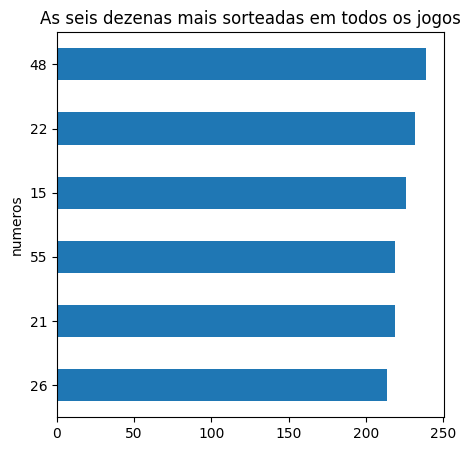

In [14]:
# As seis dezenas mais sorteadas em todos os jogos
dezenas = df.melt(value_vars=['bola 1', 'bola 2', 'bola 3', 'bola 4', 'bola 5', 'bola 6'], var_name='bola', value_name='numeros')
dezenas['numeros'].value_counts().sort_values(ascending=True).head(6).plot(kind='barh', title='As seis dezenas mais sorteadas em todos os jogos',figsize=(5,5))

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'keras'

In [ ]:
np.random.seed(8)

In [ ]:
features = df_nn.iloc[:,0:6]
target = df_nn.iloc[:,6]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(target, features, test_size=0.33, random_state=8)

In [ ]:
modelo = Sequential()
modelo.add(Dense(10, input_dim=6, activation='relu'))
modelo.add(Dense(12, activation='relu'))
modelo.add(Dense(1, activation='sigmoid'))

In [ ]:
modelo.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
modelo.fit(y_train, X_train, epochs=300, batch_size=10)

In [ ]:
scores = modelo.evaluate(y_test, X_test)
print("\n")
print("Acuracia do modelo")
print("\n%s: %2f%%" % (modelo.metrics_names[1], scores[1]*100))

In [ ]:
numero_sorteio = [[7, 14, 47, 54,56, 60]]

y_predict = pd.DataFrame(numero_sorteio)
y_predict